# Stationarization and Decomposition
In this file, the following processes will be performed in order to preprocess the data for time-series modeling:
- Train-Test Split
- Checking for stationarity using visualization and Augmented Dickey-Fuller test (ADF)
- Perform any log or differencing transformations if necessary and retest using Augmented Dickey-Fuller Test
- Time-series Decomposition

## Importing libraries
___

In [25]:
# Import basic libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
%timeit

## Creating new dataframe for Natural gas
___

In [37]:
###Slice the data to get the monthly total CO2 emissions of only Natural Gas Electric Power Sector
df_NG = pd.DataFrame()
df_NG["Natural Gas"] = df["Natural Gas"]

Here we'll perform the train-test split. The split will be done by making the test set the last two years of the data (2014-2016)

In [38]:
test_size = 24

df_train = df_NG[:-test_size]
df_test = df_NG[-test_size:]

## Initial Test for Stationarity (No Transformations)
___

In [39]:
#Import the required package

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

In [40]:
# Calculate the rolling mean and standard deviation for a window of 12 observations
rolmean=df_train.rolling(window=12).mean()
rolstd=df_train.rolling(window=12).std()

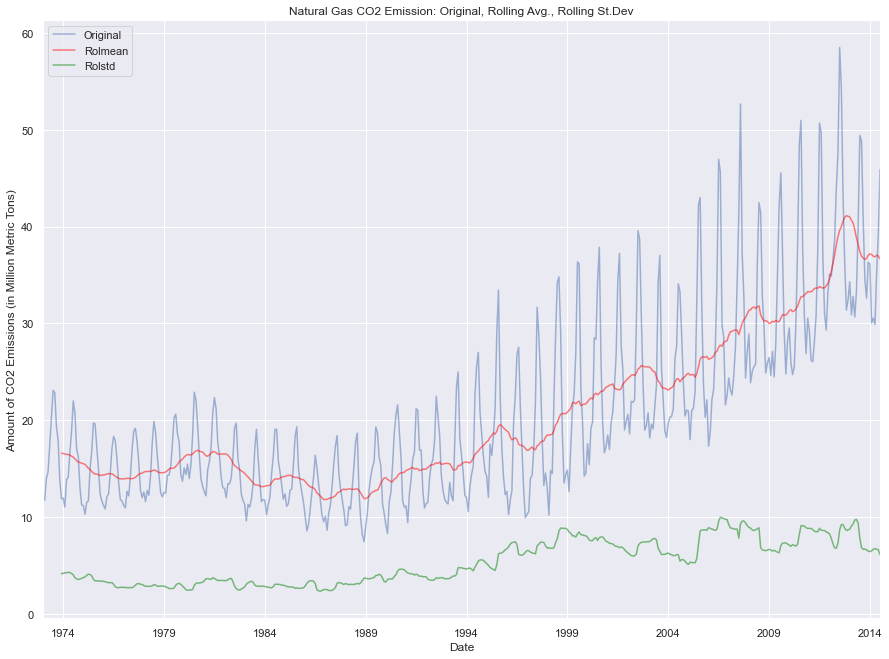

In [41]:
# Graph the Original data with Rolmean and Rolstd using line plot
axes = df_train["Natural Gas"].plot(marker="None", alpha=0.5, linestyle='-', figsize=(15, 11), subplots=True, label = "Original")
axes = rolmean["Natural Gas"].plot(marker="None", color = "red", alpha=0.5, linestyle='-', figsize=(15, 11), subplots=True,label = "Rolmean")
axes = rolstd["Natural Gas"].plot(marker="None", color = "green", alpha=0.5, linestyle='-', figsize=(15, 11), subplots=True,label = "Rolstd")
for ax in axes:
    ax.set_title("Natural Gas CO2 Emission: Original, Rolling Avg., Rolling St.Dev")
    ax.set_ylabel("Amount of CO2 Emissions (in Million Metric Tons)")
    ax.set_xlabel("Date")
    ax.legend(loc="upper left")

### Observations:
- The data is showing an upward trend in the mean and standard deviation, so the data is not stationary. We can also see seaonality by the formation of local maximums and minimums.

To support the visual inspection, we'll also prove non-stationarity by the ADF Test.The null and alternate hypotheses for the ADF Test are defined as:
- Null hypothesis: The Time Series is non-stationary

- Alternative hypothesis: The Time Series is stationary

In [42]:
#Define a function to use adfuller test
def adfuller(dataset):
  from statsmodels.tsa.stattools import adfuller
  print('Dickey-Fuller Test: ')
  adftest = adfuller(dataset['Natural Gas'])
  adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Observations'])
  for key,value in adftest[4].items():
    adfoutput['Critical Value (%s)'%key] = value
  print(adfoutput)
adfuller(df_train)

Dickey-Fuller Test: 
Test Statistic            0.435097
p-value                   0.982761
Lags Used                15.000000
No. of Observations     483.000000
Critical Value (1%)      -3.443962
Critical Value (5%)      -2.867543
Critical Value (10%)     -2.569967
dtype: float64


### Observations
- The p-value was 0.982761, which is greater than 0.05, meaning we fail to reject the null hypothesis.
- The the data is non-stationary, we'll need to do some data transformations to make it stationary.

## Transformation of the dataset into a stationary one
___

We can use some of the following methods to convert a non-stationary series into a stationary one:
1. Log Transformation
2. Log + Differencing the series (lagged series)

We take the average of ‘k’ consecutive values depending on the frequency of time series (in this capstone 12 months). 
Here, we will take the average over the past 1 year.

**1. Log Transformation**

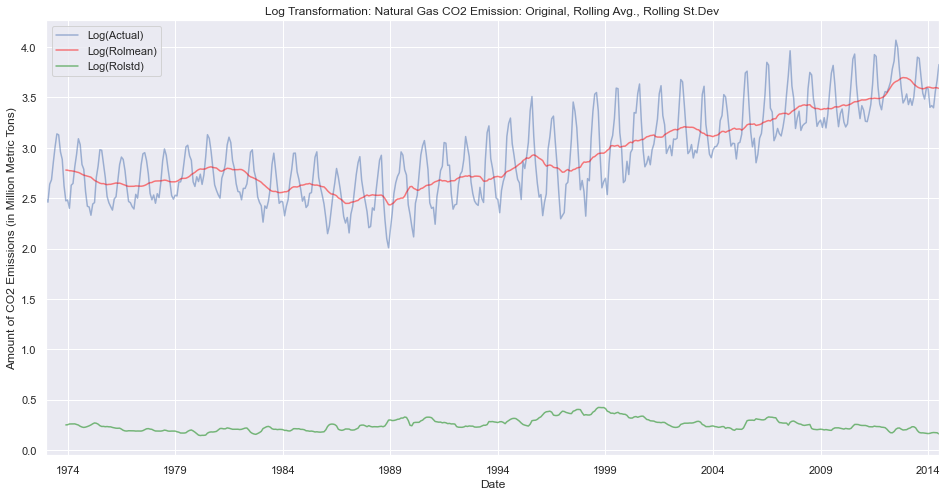

In [43]:
 #Visualize the rolling mean and standard deviation after using log transformation
plt.figure(figsize=(16,8))
df_log = np.log(df_train)
MAvg = df_log.rolling(window=12).mean()
MStd = df_log.rolling(window=12).std()

axes = df_log["Natural Gas"].plot(marker="None", alpha=0.5, linestyle='-', figsize=(15, 11), subplots=True, label = "Log(Actual)")
axes = MAvg["Natural Gas"].plot(marker="None", color = "red", alpha=0.5, linestyle='-', figsize=(15, 11), subplots=True,label = "Log(Rolmean)")
axes = MStd["Natural Gas"].plot(marker="None", color = "green", alpha=0.5, linestyle='-', figsize=(15, 11), subplots=True,label = "Log(Rolstd)")
for ax in axes:
    ax.set_title("Log Transformation: Natural Gas CO2 Emission: Original, Rolling Avg., Rolling St.Dev")
    ax.set_ylabel("Amount of CO2 Emissions (in Million Metric Tons)")
    ax.set_xlabel("Date")
    ax.legend(loc="upper left")

### Observations
- The log transformation of the standard deviation is constant across the time series; however, the log transformation of the mean is less trending than the original data. Although the trend upward is less stark than the original data, it still is not constant over time, which does not satisfy the stationary classification.

Like before, let's verify the visual inspection by performing the ADF test.

In [44]:
# Augmented Dickey-Fuller test for Log(dataset)
adfuller(df_log)

Dickey-Fuller Test: 
Test Statistic            0.109704
p-value                   0.966717
Lags Used                17.000000
No. of Observations     481.000000
Critical Value (1%)      -3.444018
Critical Value (5%)      -2.867568
Critical Value (10%)     -2.569980
dtype: float64


### Observations
- The Dickey-Fuller Test for the log transformation resulted with the p-value = 0.966717 > 0.05, so we fail the to reject the null hypothesis. So, the log transformation of the data is non-stationary.

**2. Log + Differencing Series**

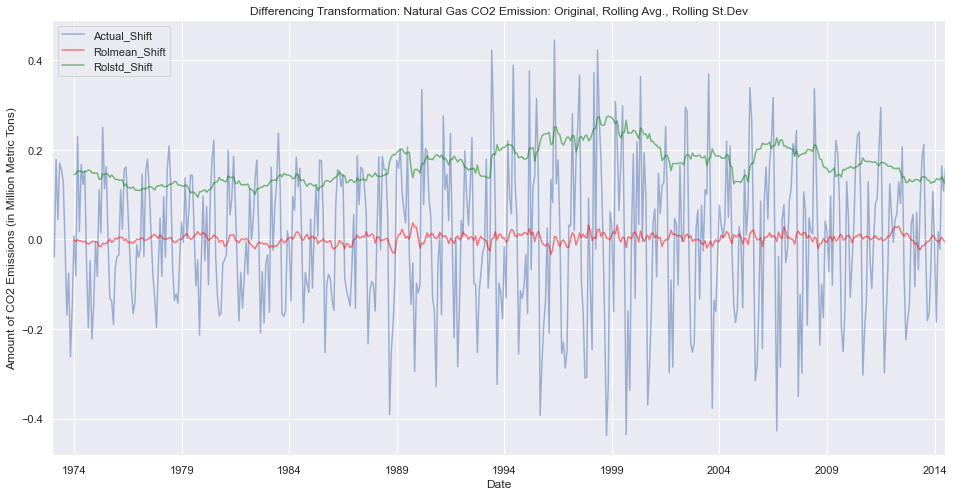

In [45]:
plt.figure(figsize=(16,8))
df_shift = df_log - df_log.shift(periods = 1)
MAvg_shift = df_shift.rolling(window=12).mean()
MStd_shift = df_shift.rolling(window=12).std()


axes = df_shift["Natural Gas"].plot(marker="None", alpha=0.5, linestyle='-', figsize=(15, 11), subplots=True, label = "Actual_Shift")
axes = MAvg_shift["Natural Gas"].plot(marker="None", color = "red", alpha=0.5, linestyle='-', figsize=(15, 11), subplots=True,label = "Rolmean_Shift")
axes = MStd_shift["Natural Gas"].plot(marker="None", color = "green", alpha=0.5, linestyle='-', figsize=(15, 11), subplots=True,label = "Rolstd_Shift")
for ax in axes:
    ax.set_title("Differencing Transformation: Natural Gas CO2 Emission: Original, Rolling Avg., Rolling St.Dev")
    ax.set_ylabel("Amount of CO2 Emissions (in Million Metric Tons)")
    ax.set_xlabel("Date")
    ax.legend(loc="upper left")

#Dropping the null values that we get after applying differencing method
df_shift = df_shift.dropna()


### Observations
- From the visual test, the rolling mean and rolling standard deviations with differencing transformations results in non-trending data, so the time series is stationary.

Let's verify the visual inspection by performing the ADF test.

In [46]:
# Augmented Dickey-Fuller Test with differencing transformation applied to the log transformation of the time-series data
adfuller(df_shift)

Dickey-Fuller Test: 
Test Statistic           -4.951428
p-value                   0.000028
Lags Used                18.000000
No. of Observations     479.000000
Critical Value (1%)      -3.444076
Critical Value (5%)      -2.867593
Critical Value (10%)     -2.569994
dtype: float64


### Observations
- After performing the Dickey-Fuller test on the data, which was transformed using the differencing technique (where shift = 1 past time point), the p-value was found to be 0.000028 which is less than 0.05. Since the p-value is less than the level of signficance, we reject the null hypothesis, so the dataset is stationary.

For time-series modeling, we will apply the log + differencing transformations

## Elimination of trend and seasonality: Decomposition
___

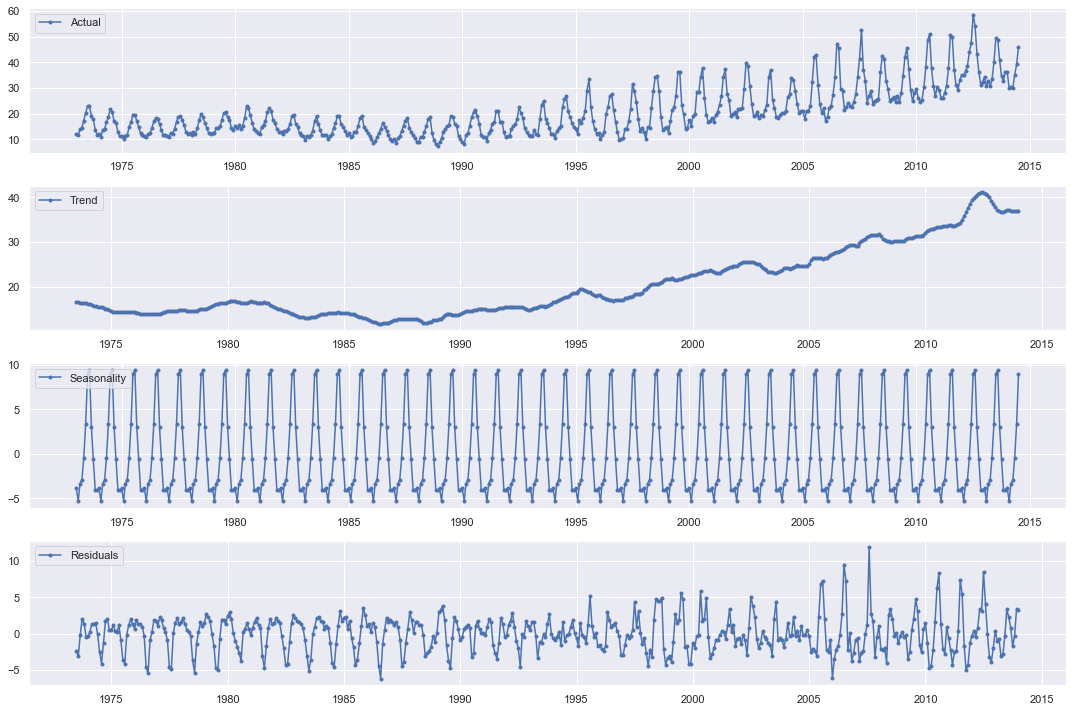

In [47]:
#Importing the seasonal_decompose function to decompose the time series
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(df_train, model = 'additive')
trend= decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid


plt.figure(figsize=(15,10))
plt.subplot(411)
plt.plot(df_train, label='Actual', marker='.')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', marker='.')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', marker='.')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals', marker='.')
plt.legend(loc='upper left')
plt.tight_layout()

Looking deeper into the seasonalitY, let's plot Total Emissions per month for Natural Gas Over all years

Text(0.5, 1.0, 'Total CO2 Emissions per Month for Natural Gas')

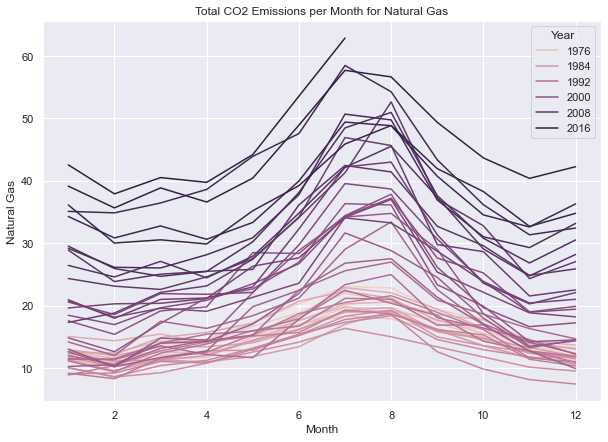

In [48]:
sns.set(rc={'figure.figsize':(10,7)})
sns.lineplot(x=df['Month'],y=df['Natural Gas'],hue=df['Year'],)
plt.title('Total CO2 Emissions per Month for Natural Gas')

### Observations
- The decomposition shows significant trend and seasonality.
- Looking into the seasonality deeper, there is a trend of higher emissions around month 7 every year